# Importing and preprocessing data

In [1]:
# Shuffle data & Construct random dataset
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
data=pd.read_excel(r"/Users/asligul/Downloads/london_1.xlsx")
data = shuffle(data)
data = data[:int(len(data)*0.2+1)]
data.to_excel("london_x.xlsx")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix,classification_report, ConfusionMatrixDisplay

data=pd.read_excel(r"/Users/asligul/Downloads/london_1.xlsx")
data.head(5)

,year,quarter,market,mode,purpose,nights_2,visits_2,spend
0,2019,January-March,Belgium,Air,Holiday,3.401,1.133,0.789029
1,2019,January-March,Belgium,Air,Business,20.442,5.082,1.340236
2,2019,January-March,Belgium,Air,Miscellaneous,0.612,0.612,0.039774
3,2019,January-March,Belgium,Sea,Holiday,1.757,1.731,0.895620
4,2019,January-March,Belgium,Sea,VFR,12.735,5.656,1.126579


In [3]:
data[['quarter', 'market','mode','purpose']] = data[['quarter', 'market','mode','purpose']].apply(preprocessing.LabelEncoder().fit_transform)

# Modify category

In [4]:
# 3 classes
def categorize_expenses(x):

    low=0.9
    medium=3.8
    
    if x<low:
        return 'low'
    elif x<medium:
        return 'medium'
    else:
        return 'high'
    
data["expense_cat"] = data.spend.apply(categorize_expenses)


In [5]:
data["expense_cat"].value_counts()

medium    996
high      987
low       982
Name: expense_cat, dtype: int64

# Train test split

In [6]:
X = data[['quarter','mode','purpose',"market","visits_2","nights_2"]]

# Classification
y = data['expense_cat']

# Randomize    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print('train size:', len(X_train))
print('test size:', len(X_test))


train size: 2075
test size: 890


# KNN


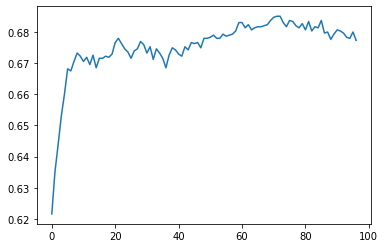

max score: 0.6849879716012439
k: 74


In [7]:
# Cross-Validation
results = []
max_score = 0
max_score_index = 0
for k in range(3, 100):
    knn = KNeighborsClassifier(n_neighbors=k)
    
    scores = cross_val_score(knn, X, y, cv=3)
    score = scores.mean()
    
    results.append(score)
    if score > max_score:
        max_score = score
        max_score_index = k
plt.figure()
plt.plot(results)
plt.show()

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('max score:', max_score)
print('k:', max_score_index)

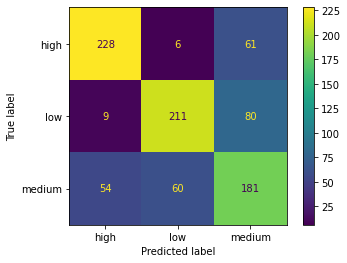

In [8]:

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

In [9]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        high       0.78      0.77      0.78       295
         low       0.76      0.70      0.73       300
      medium       0.56      0.61      0.59       295

    accuracy                           0.70       890
   macro avg       0.70      0.70      0.70       890
weighted avg       0.70      0.70      0.70       890



In [10]:
comp=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
comp = pd.concat([X_test.reset_index(drop=True), comp.reset_index(drop=True)], axis= 1)
comp.head()

,quarter,mode,purpose,visits_2,nights_2,Actual,Predicted
0,1,1,0,1.649,4.946,low,low
1,2,0,4,21.329,269.631,high,high
2,1,1,0,3.297,6.595,low,medium
3,0,0,4,12.633,30.876,high,high
4,1,0,1,2.381,14.311,medium,medium


# SVM

In [11]:
# Cross-Validation
clf = svm.SVC(kernel='rbf', C=1)
scores = cross_val_score(clf, X, y, cv=3)
score = scores.mean()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(score)

0.6627272466770099


In [12]:
# Cross-Validation - Confussion Matrix
confusion_matrix(y_test, y_pred)

array([[206,  14,  75],
       [  4, 241,  55],
       [ 35, 112, 148]])

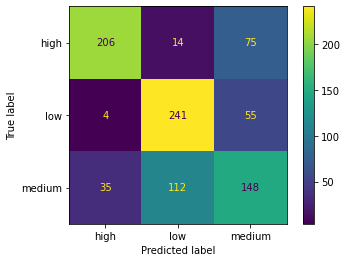

In [13]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        high       0.84      0.70      0.76       295
         low       0.66      0.80      0.72       300
      medium       0.53      0.50      0.52       295

    accuracy                           0.67       890
   macro avg       0.68      0.67      0.67       890
weighted avg       0.68      0.67      0.67       890



In [15]:
comp=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
comp = pd.concat([X_test.reset_index(drop=True), comp.reset_index(drop=True)], axis= 1)
comp.head()

,quarter,mode,purpose,visits_2,nights_2,Actual,Predicted
0,1,1,0,1.649,4.946,low,low
1,2,0,4,21.329,269.631,high,high
2,1,1,0,3.297,6.595,low,low
3,0,0,4,12.633,30.876,high,high
4,1,0,1,2.381,14.311,medium,medium


# Decision Tree

### Cross-Validation

In [16]:
clf = tree.DecisionTreeClassifier()
scores = cross_val_score(clf, X, y, cv=3)
score = scores.mean()
print("Cross-Validation Accuracy:",score)

Cross-Validation Accuracy: 0.5912299123011698


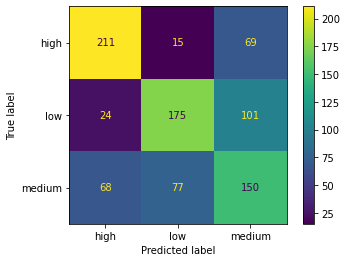

In [17]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        high       0.70      0.72      0.71       295
         low       0.66      0.58      0.62       300
      medium       0.47      0.51      0.49       295

    accuracy                           0.60       890
   macro avg       0.61      0.60      0.60       890
weighted avg       0.61      0.60      0.60       890



In [19]:
comp=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
comp = pd.concat([X_test.reset_index(drop=True), comp.reset_index(drop=True)], axis= 1)
comp.head()

,quarter,mode,purpose,visits_2,nights_2,Actual,Predicted
0,1,1,0,1.649,4.946,low,medium
1,2,0,4,21.329,269.631,high,high
2,1,1,0,3.297,6.595,low,low
3,0,0,4,12.633,30.876,high,high
4,1,0,1,2.381,14.311,medium,medium
